# Video timestamp retrieval
**Purpose**
    The purpose of this notebook is to figure out how to take a frame from an AVI video and use opencv to read the text at the bottom of the frame, and save a file with the info (timestamp, temperature)
    
**Outline**
1. Import a frame of the file
2. Read text using opencv
3. Parse text 
4. Save out txt file with the same name as the video.txt

5. Then make this into a function that can run on a file
6. Use it on a folder of AVI files

# Imports

In [1]:
import cv2
import numpy as np
import pandas as pd
import argparse
import time
from imutils.object_detection import non_max_suppression
import matplotlib.pyplot as plt
import pytesseract

# User inputs

In [6]:
# LATER CHANGE TO folder of videos
folder_of_videos_path='/Users/emilydennis/Desktop/fieldwork_videos'

# video
video_path='/Users/emilydennis/Desktop/fieldwork_videos/05292021_09B_11.AVI'

# Define functions

# Process

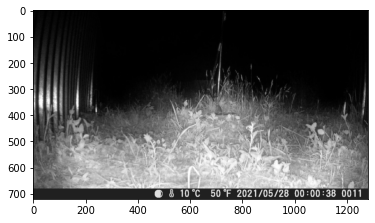

In [7]:
img = cv2.VideoCapture(video_path)
ret, frame = img.read()
plt.figure()
plt.imshow(frame)

In [9]:
f2 = frame.copy()
np.shape(f2)

(720, 1280, 3)

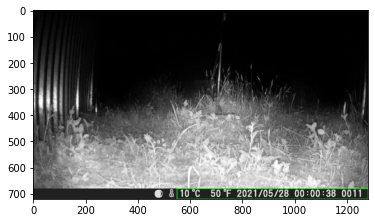

In [10]:
rect = cv2.rectangle(f2, (550,680), (1280,720), (0, 255, 0), 2)
plt.imshow(rect)

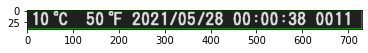

In [11]:
# crop image
cropped=f2[680:720,550:1280]

#plot
plt.imshow(cropped)

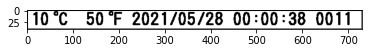

In [12]:
# make grayscale
gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
# threshold and binarize
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# plot
plt.imshow(thresh,cmap='gray')

In [13]:
# get text from image
text = pytesseract.image_to_string(thresh)
textlist = text.split()
print(textlist)

['10°C', '50°F', '2021/05/28', '00:00:38', '0011']


In [35]:
# parse string into a data structure
data={}
data['video']=video_path

for substr in textlist:
    print(substr)
    if "F" in substr:
        data['F']=substr.split('°')[0]
    elif "C" in substr:
        data['C']=substr.split('°')[0]
    elif "2021" in substr:
        data['date']=substr.split('/')[0]+substr.split('/')[1]+substr.split('/')[2]
    elif ":" in substr:
        data['time']=substr.split(':')[0]+substr.split(':')[1]+substr.split(':')[2]
        
# sometimes the first degree measure, Celcius, gets missed, but we can calculate it from F
if 'C' not in data:
    data['C']=str(round((int(data['F'])-32)*(5/9)))
print(data)

10°C
50°F
2021/05/28
00:00:38
0011
{'video': '/Users/emilydennis/Desktop/fieldwork_videos/05292021_09B_11.AVI', 'C': '10', 'F': '50', 'date': '20210528', 'time': '000038'}


In [36]:
df = pd.DataFrame(columns=['video','date','time','C','F'])
df.append(data,ignore_index=True)

,video,date,time,C,F
0,/Users/emilydennis/Desktop/fieldwork_videos/05...,20210528,000038,10,50


# To do next:
1. make above into a function: for a video name, get the data and append to a df
2. make another function that takes in a folder name, runs a loop of fx 1, and saves out a dataframe
3. make the fx from 2 flexible so an AVI input also works
4. make the fx from 2 flexible so that if there's already a dataframe in the folder, we load it then append/save